In [1]:
import numpy as np
import pickle
from scipy.io import savemat, loadmat
from helpers import *

[[14, 14, 7, 16, 6, 9], [35, 16, 15]]

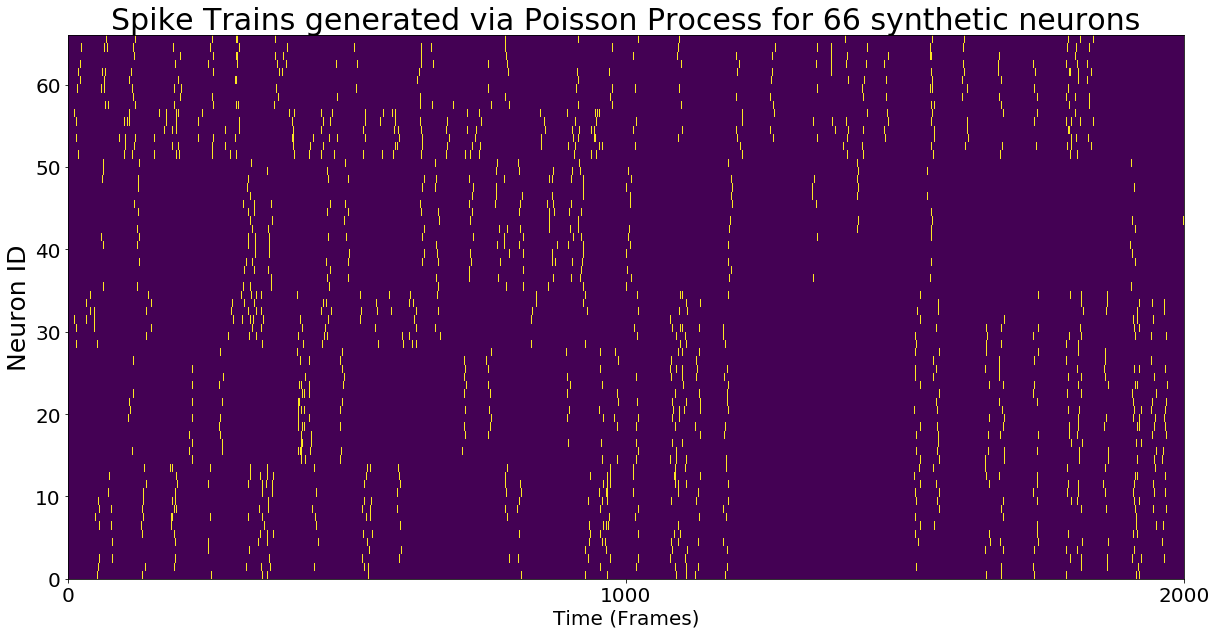

In [5]:
comms1 = 6
comms2 = 3

layers = 2

fixed_size = [int(np.random.power(3/2)*20) for i in range(comms1)]

path = '/Users/bengieru/Desktop/DPPM/analysis/'
case = 'M_ESCR/'

M_ESCR_comm_size = [fixed_size, [fixed_size[0]+fixed_size[1]+fixed_size[2],fixed_size[3],fixed_size[4]+fixed_size[5]]] #layer2 community sizes
spike_rates = [[int(abs(np.random.normal(20,8))) for i in range(comms1)],#spikerates of the respective communities
              [int(abs(np.random.normal(20,8))) for i in range(comms2)]]#spikerates of the respective communities

window_size = 1000 # size, in frames, each adjacency matrix correspond to. better to be equal to bin_size 
standard_dev = 1.2 # for gaussian kernel
k = 5 #for jittering the spikes
pad = True
num_neurons = int(sum(M_ESCR_comm_size[0]))

M_ESCR_spikes = create_time_series('merge', M_ESCR_comm_size, spike_rates, windowsize = window_size, k = k)
M_ESCR_comm_size

In [8]:
num_neurons = sum(M_ESCR_comm_size[0])
layers = len(M_ESCR_comm_size)+2

binned_spikes_M_ESCR = bin_time_series(M_ESCR_spikes, window_size, gaussian = True, sigma = standard_dev)

adjacency_matrices = {}
for i in range(1,layers-1):
    adjacency_matrices['t%d'%i] = cross_correlation_matrix(binned_spikes_M_ESCR[i-1])[0]
if pad:
    adjacency_matrices['t%d'%0] = adjacency_matrices['t%d'%1]
    adjacency_matrices['t%d'%(layers-1)] = adjacency_matrices['t%d'%(layers-2)]

C:\Users\bengieru\Desktop\DPPM\analysis\M_ESCR\helpers.py:29: RuntimeWarning: invalid value encountered in sqrt
  x_cov_std = np.nanmax(np.sqrt(np.correlate(x - x_mean, x - x_mean, 'full')))
C:\Users\bengieru\Desktop\DPPM\analysis\M_ESCR\helpers.py:30: RuntimeWarning: invalid value encountered in sqrt
  y_cov_std = np.nanmax(np.sqrt(np.correlate(y - y_mean, y - y_mean, 'full')))


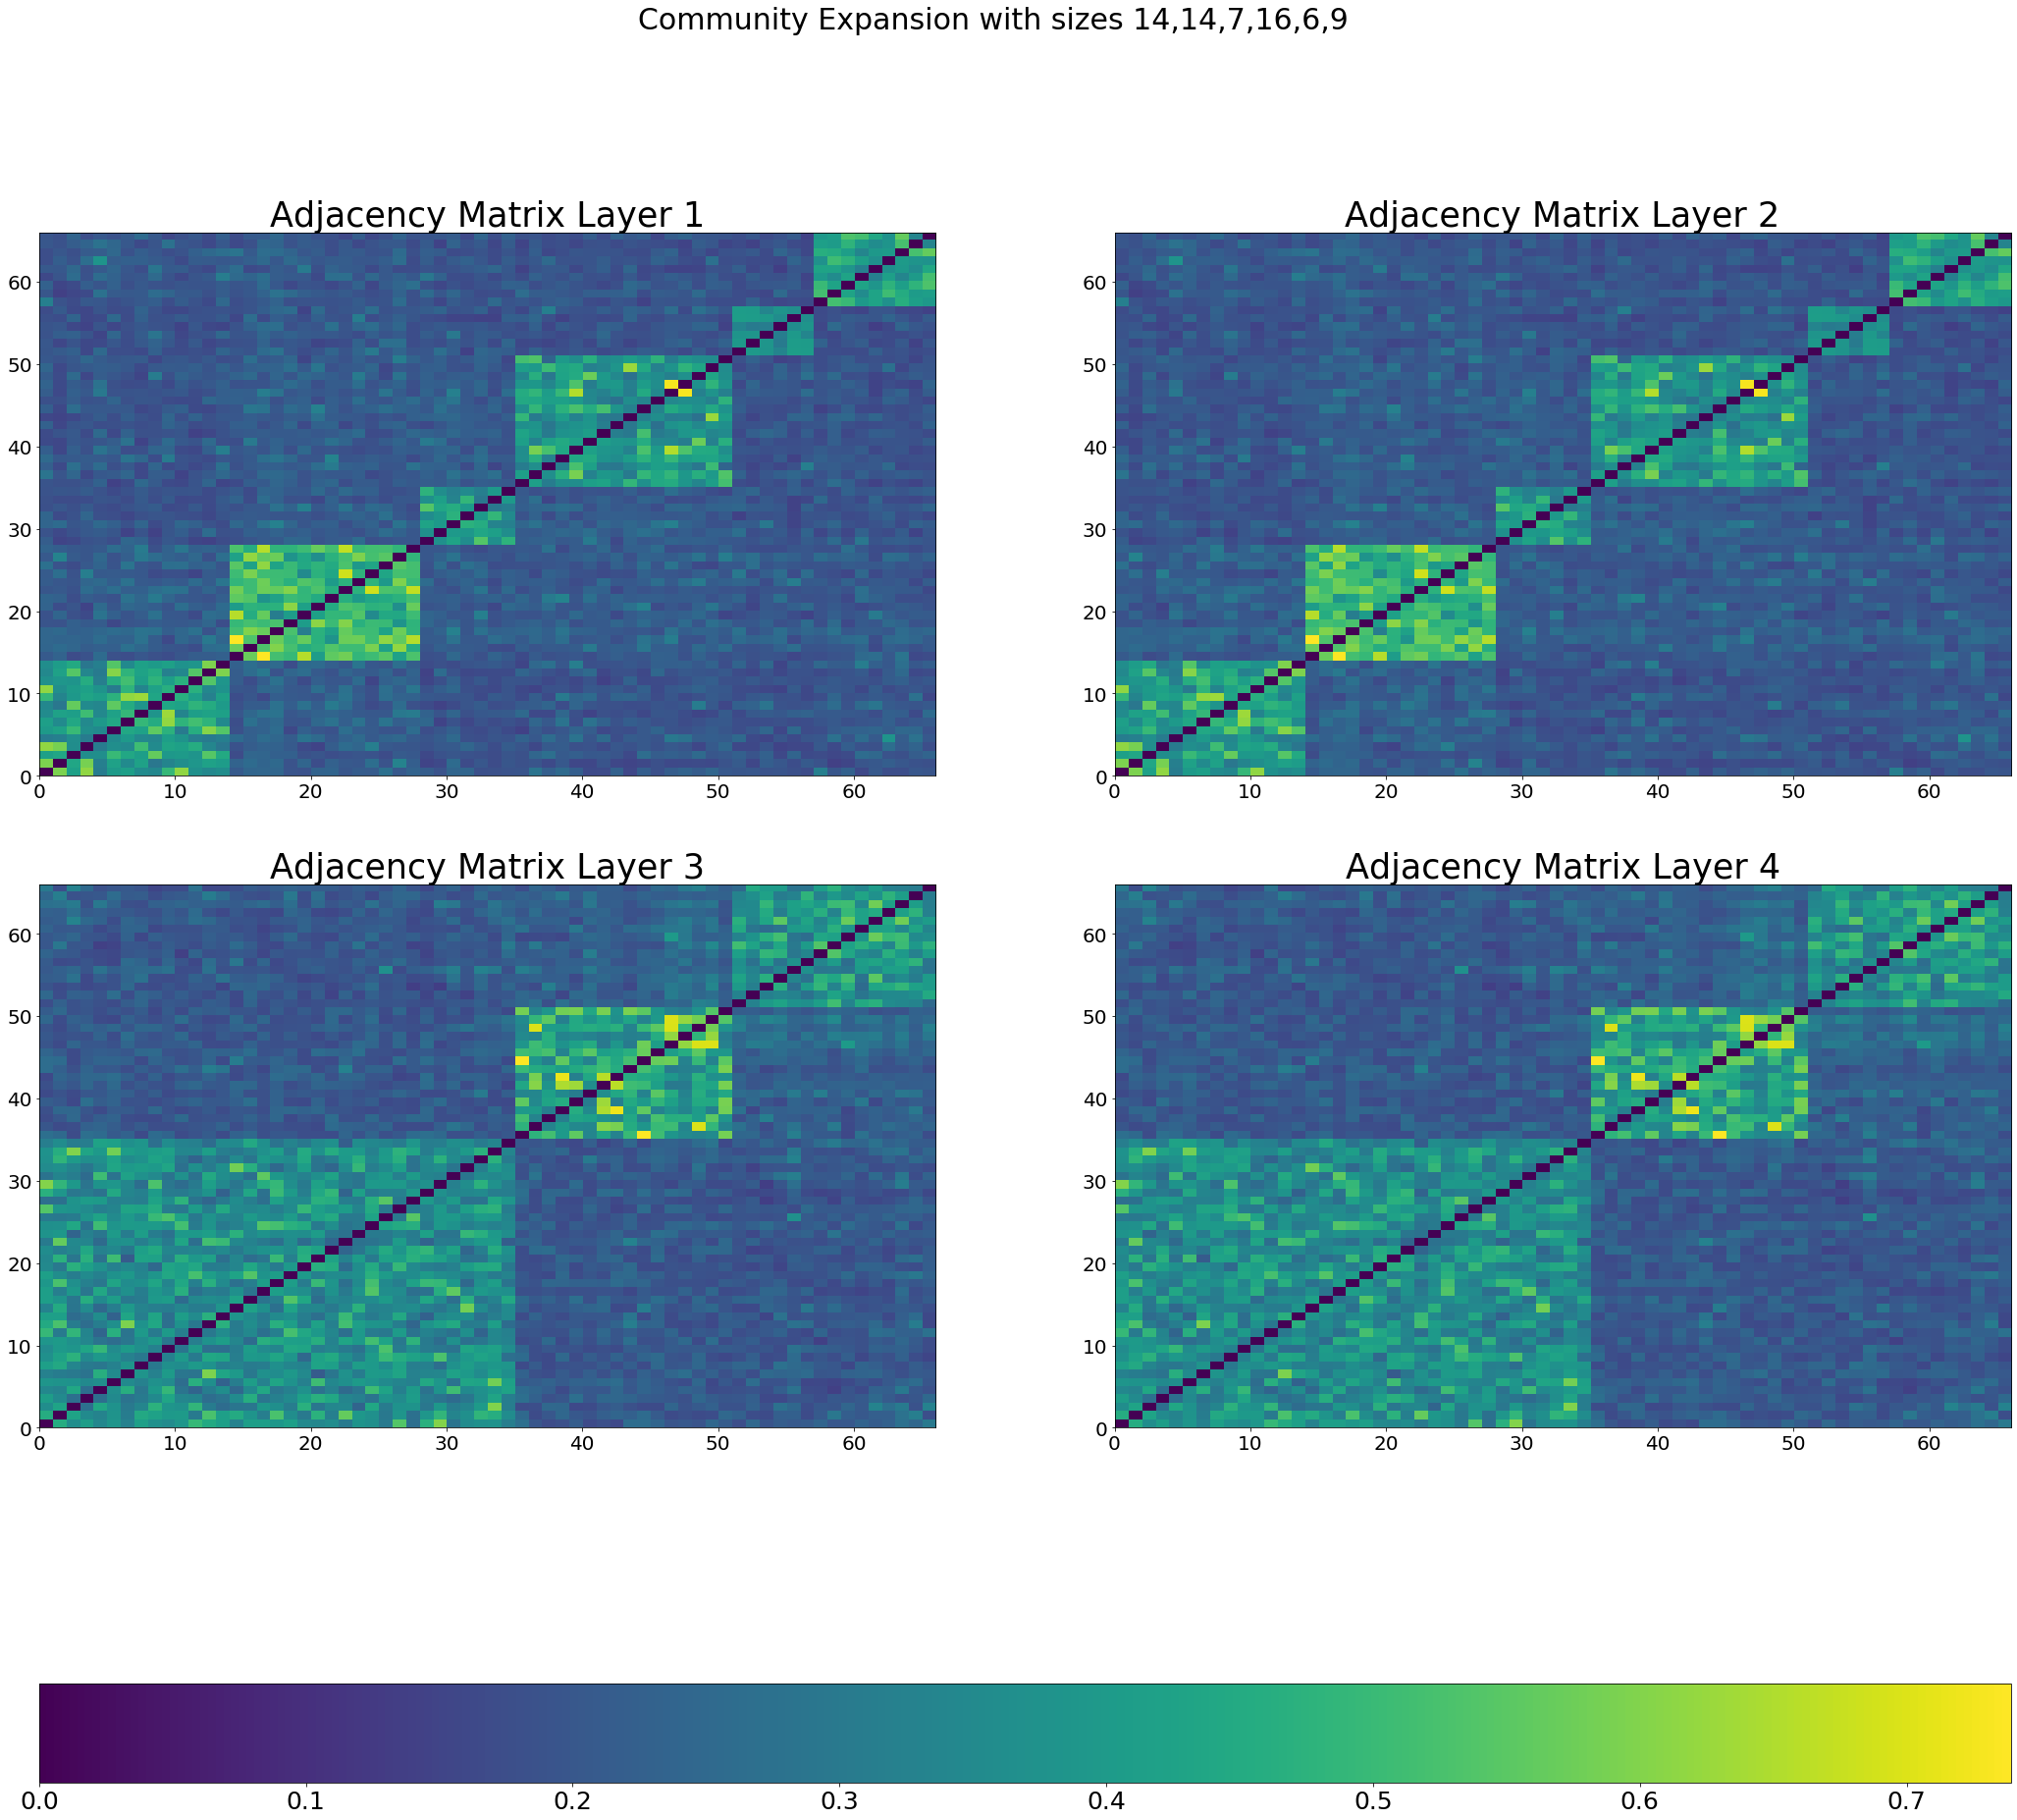

In [10]:
fig, ax = plt.subplots(2,2,figsize=(36,32))
for i in range(2):
    for j in range(2):
        k = ax[i][j].imshow(adjacency_matrices['t%d'%(i*2+j)], 
                            origin = 'lower', 
                            interpolation = 'nearest',
                            aspect = 'auto',
                            extent = [0,num_neurons,0,num_neurons])
        ax[i][j].set_title("Adjacency Matrix Layer %d"%(i*2+j+1), fontsize = 35)
        ax[i][j].set_xticks([k*10 for k in range(int(num_neurons/10)+1)])
        ax[i][j].set_yticks([k*10 for k in range(int(num_neurons/10)+1)])
        ax[i][j].tick_params(axis = 'both', labelsize = 20)
fig.suptitle('Community Expansion with sizes %d,%d,%d,%d,%d,%d'%(M_ESCR_comm_size[0][0],M_ESCR_comm_size[0][1],M_ESCR_comm_size[0][2],M_ESCR_comm_size[0][3],M_ESCR_comm_size[0][4],M_ESCR_comm_size[0][5]), fontsize = 30)
cbar = fig.colorbar(k, ax = ax.flat, orientation = 'horizontal')
cbar.ax.tick_params(labelsize = 25)

In [11]:
thresholded_adjacencies = {}
threshs = np.linspace(0.05,0.6,12)
for i,e in enumerate(threshs):
    one_set = []
    for j in range(layers):
        one_set.append(binarize(adjacency_matrices['t%d'%j],e))
    thresholded_adjacencies['T%d'%i] = one_set
arr ={}
arr['TA'] = thresholded_adjacencies

In [12]:
savemat(path+case+'M_ESCR_adjacencies.mat', arr)